# SMOTE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

np.random.seed(123)

df = pd.read_csv("creditcard.csv") 

# definimos las clases
y = df['Class']
X = df.drop('Class', axis=1)
X = X.to_numpy()

Visualizacion de datos

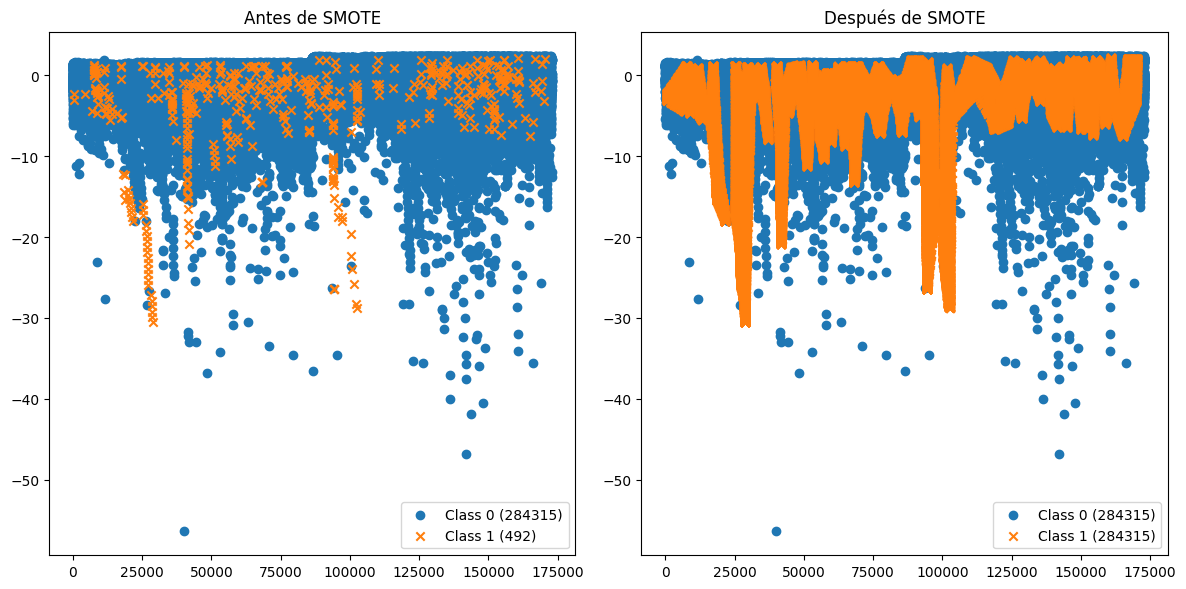

In [2]:
# Separa los datos en dos clases
X_class_0 = X[y == 0]
X_class_1 = X[y == 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label=f'Class 0 ({len(X_class_0)})', marker='o')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], label=f'Class 1 ({len(X_class_1)})', marker='x')
plt.title('Antes de SMOTE')
plt.legend()

# vecinos
k = 10

# aplicamos SMOTE
smote = SMOTE(k_neighbors=k, random_state=448)
X_smote, y_smote = smote.fit_resample(X,y)

# Separa los datos en dos clases
X_class_0 = X_smote[y_smote == 0]
X_class_1 = X_smote[y_smote == 1]


plt.subplot(1, 2, 2)
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label=f'Class 0 ({len(X_class_0)})', marker='o')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], label=f'Class 1 ({len(X_class_1)})', marker='x')
plt.title('Después de SMOTE')
plt.legend()


plt.tight_layout()
plt.show()

## Entrenamos modelo con SMOTE

In [3]:
# y generamos los conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.7)


def run_model(X_train, y_train):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=448,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
# ejecutamos el modelo 
model = run_model(X_train, y_train)

c:\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


### Resultados

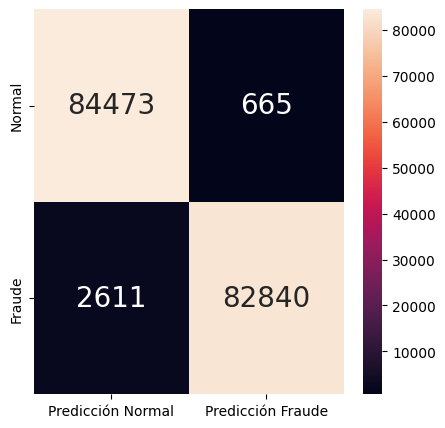

              precision    recall  f1-score   support

           0     0.9700    0.9922    0.9810     85138
           1     0.9920    0.9694    0.9806     85451

    accuracy                         0.9808    170589
   macro avg     0.9810    0.9808    0.9808    170589
weighted avg     0.9810    0.9808    0.9808    170589



In [4]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=("Predicción Normal", "Predicción Fraude"), yticklabels=("Normal", "Fraude"), annot=True, fmt="d", annot_kws={"size":20});
    plt.show()
    print (classification_report(y_test, pred_y, digits=4))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)